# 画像処理の基礎

## 画像の表示・出力

In [4]:
import cv2
import IPython
import os

In [2]:
img = cv2.imread('data/src/Berry.jpg')

In [3]:
img.shape

(589, 960, 3)

In [4]:
img[0][0]

array([128, 176, 194], dtype=uint8)

In [11]:
cv2.imshow("img", img)   # 画像表示のメソッド　 → 画像の名前 : 表示する対象（渡すもの）
cv2.waitKey(0)           # お約束 :　引数の中に入れた数に応じてキーが押されるまでの秒数を決めることができる。　０は押されるまで待つ
cv2.destroyAllWindows()  # 画像表示する際に、img window ができる。それが役目を終えたら、window を壊す役割を持っている
cv2.waitKey(1)

-1

destroyWindow( )やdestroyAllWindows( )のあとに実行するwaitKey( )の引数を0や無しとすると、  
ウィンドウは閉じられるがウィンドウがキー入力を無期限に待ち続ける」という状態となり、  
プロンプトも待受け状態のまま何のキー入力も受け付けなくなる（場合がある）ためシェルなどのプロセスごと終了せざるを得なくなるので注意

In [ ]:
os.mkidr("./output")

In [10]:
cv2.imwrite("output/test.jpg", img)

True

## 動画の表示・出力

In [12]:
import cv2
import sys

In [21]:
cap = cv2.VideoCapture("data/movie/Cosmos.mp4")  # 動画を読み込む
if cap.isOpened() == False:                 # if文を使用して正しく読み込めたか判定する
    sys.exit()                              # False の場合はプログラムから抜け出す
ret, frame = cap.read()                     # 正しく読み込めている場合は 1frame read (１フレームだけ動画を読み込む)2つ値が返ってくる。　
                                            # ret -> returnの略[真偽値が入る（true or false）正しく読み込めたかどうか], frame: 実際の１フレームの画像が格納されている
h, w = frame.shape[:2]                      # y,x,color 
fourcc = cv2.VideoWriter_fourcc(*"XVID")      # wirte setting
dst = cv2.VideoWriter("output/test.avi", fourcc, 30.0, (w, h))  # 動画の書き込み（出力先：コーデック設定：FPSの設定１秒間に何フレーム進めるか：動画の解像度）

# 上記は動画を再生させる前段階の設定。読み込みと表示のさせ方

# メインのプログラム
while True:
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imshow("img", frame)
    dst.write(frame)
    if cv2.waitKey(30) == 27:  # 27 -> esc key
        break
cv2.destroyAllWindows()
cv2.waitKey(1)
cap.release()

## ウィンドウの調整

In [8]:
img = cv2.imread("data/src/Lena.jpg")
cv2.namedWindow("window", cv2.WINDOW_AUTOSIZE)  # window を オートで設定してくれる
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [12]:
cv2.namedWindow("window", cv2.WINDOW_NORMAL)  # window を可変的に設定・変更できる
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [13]:
cv2.namedWindow("window", cv2.WINDOW_NORMAL)  # window を可変的に設定・変更できる
cv2.resizeWindow("window", 640, 480)
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## resize

In [16]:
img = cv2.imread("data/src/grapes.jpg")
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-16 15:52:23.641 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 15:52:23.641 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 15:52:23.641 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:
2021-08-16 15:52:23.642 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 15:52:23.642 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 15:52:23.642 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:


-1

In [17]:
img.shape

(640, 960, 3)

### image size setting

In [24]:
size = (300, 200)  # width:hieht , tuple 型でサイズを指定。こちらは、幅：高さの順番なので注意
img_resize = cv2.resize(img, size)

In [25]:
img_resize.shape

(200, 300, 3)

In [28]:
cv2.imshow("resize", img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 画像圧縮のその他の方法

In [30]:
img_area = cv2.resize(img, size, interpolation = cv2.INTER_AREA)  # interpolation = cv2.INTER_AREA :圧縮方法
img_linear = cv2.resize(img, size, interpolation = cv2.INTER_LINEAR)  # interlinear の方が優れている：　デフォルトで設定されている
cv2.imshow("area", img_area)
cv2.imshow("linear", img_linear)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-16 16:09:51.018 python3.9[37584:1164569] IMKClient Stall detected, *please Report* your user scenario attaching a spindump (or sysdiagnose) that captures the problem - (imkxpc_dismissFunctionRowItemTextInputViewWithReply:) block performed very slowly (27.16 secs).
2021-08-16 16:09:51.018 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 16:09:51.018 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 16:09:51.018 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:
2021-08-16 16:09:51.018 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 16:09:51.018 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 16:09:51.018 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:
2021-08-16 16:09:51.018 python3.9

-1

## 色空間・グレースケール

In [33]:
img = cv2.imread("data/src/grapes.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # BGR -> gray 
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)       # BGR -> HSV

In [36]:
img_gray.shape

(640, 960)

In [37]:
img_hsv.shape

(640, 960, 3)

In [39]:
cv2.imshow("img", img)
cv2.imshow("gray", img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-16 17:07:04.134 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 17:07:04.134 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 17:07:04.134 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:
2021-08-16 17:07:04.135 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 17:07:04.135 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 17:07:04.135 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:


-1

### 簡単なグレースケール化
- imread の時点で引数に　０　を入れる事によって簡単にグレースケール化する事ができる

In [40]:
img_gray2 = cv2.imread("data/src/grapes.jpg", 0)

In [41]:
cv2.imshow("gray2", img_gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-16 17:10:31.636 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 17:10:31.636 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 17:10:31.636 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:
2021-08-16 17:10:31.636 python3.9[37584:1164569] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 17:10:31.636 python3.9[37584:1164569] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 17:10:31.636 python3.9[37584:1164569] Text input context does not respond to _valueForTIProperty:


-1

In [43]:
img_hsv

array([[[ 46, 138, 175],
        [ 46, 152, 159],
        [ 45, 128, 177],
        ...,
        [105, 151, 233],
        [104, 148, 228],
        [104, 149, 222]],

       [[ 46, 181, 134],
        [ 45, 198, 121],
        [ 45, 168, 141],
        ...,
        [104, 157, 213],
        [104, 155, 214],
        [104, 158, 211]],

       [[ 45, 193, 127],
        [ 45, 215, 114],
        [ 44, 200, 125],
        ...,
        [103, 172, 173],
        [103, 167, 194],
        [103, 168, 202]],

       ...,

       [[ 39, 249,  45],
        [ 38, 255,  46],
        [ 38, 250,  52],
        ...,
        [ 33, 112, 196],
        [ 32, 110, 190],
        [ 31, 108, 187]],

       [[ 39, 255,  49],
        [ 38, 250,  52],
        [ 39, 234,  60],
        ...,
        [ 35, 108, 206],
        [ 34, 102, 205],
        [ 33, 107, 188]],

       [[ 38, 250,  52],
        [ 38, 233,  58],
        [ 39, 218,  68],
        ...,
        [ 36, 114, 193],
        [ 35, 107, 196],
        [ 34, 103, 196]]

#### 注意！！！　HSVの順番になっているのだが、Open CV は整数しか扱えず、２５６段階しか扱えないので、実際の半分の値で表されている

## ヒストグラム
- 画素値の分布を描かせる事ができる
- 赤が多いのか緑が多いのか青が多いのか

In [9]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
img = cv2.imread("data/src/Lena.jpg")
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

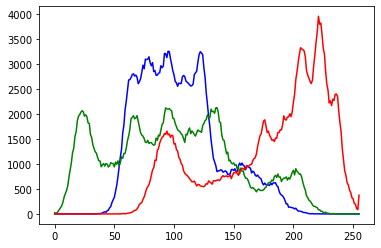

In [11]:
# 3回ヒストグラムを書かせる必要がある: list -> for ループ
color_list = ["blue", "green", "red"]
for i,j in enumerate(color_list):                          # enumerate で index, 文字列を取得
    hist = cv2.calcHist([img],[i], None, [256], [0, 256])  # BGR の順番で計算するので i=index(0, 1, 2)を渡す/ マスクする画像があるか？:no/ ビンの数 default の数で設定
    plt.plot(hist, color = j)                              # ヒストグラム表示で　color を指定

#### 画像が赤みを帯びていることがわかる

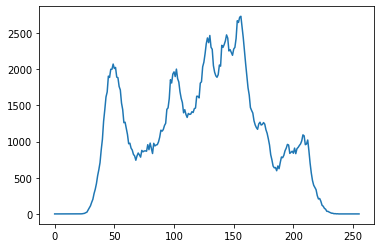

In [12]:
img_gray = cv2.imread("data/src/Lena.jpg", 0)
hist2 = cv2.calcHist([img_gray], [0], None, [256], [0,256])
plt.plot(hist2)

### ヒストグラム均一化
- 分布をなくして均一にしてくれる

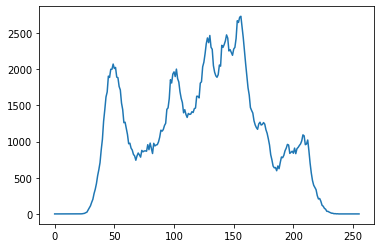

In [13]:
img = cv2.imread("data/src/Lena.jpg", 0)  # 最初からグレースケール化
hist = cv2.calcHist([img], [0], None, [256], [0, 256])  # calcHist : histグラムの計算を行う
plt.plot(hist)

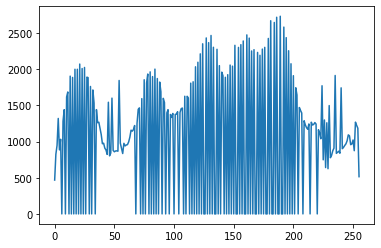

In [14]:
img_eq = cv2.equalizeHist(img)  # equalizeHist:ヒストグラムの均一化を１行で記述する事ができる
hist_e = cv2.calcHist([img_eq], [0], None, [256], [0,256])
plt.plot(hist_e)

#### 元々無かった強度の強い所、弱い所にも画素値が現れている
- ヒストグラム化を行う事によって、なるべく全ての強度が満遍なく出るように、分布するようになっている
- 暗い部分はより暗く、明るい部分はより明るく　→ 明暗がよりハッキリする

In [22]:
cv2.imshow('img', img)
cv2.imshow('eq', img_eq)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2021-08-16 23:33:00.056 python3[4180:27815] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 23:33:00.056 python3[4180:27815] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 23:33:00.056 python3[4180:27815] Text input context does not respond to _valueForTIProperty:
2021-08-16 23:33:00.066 python3[4180:27815] _TIPropertyValueIsValid called with 4 on nil context!
2021-08-16 23:33:00.067 python3[4180:27815] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2021-08-16 23:33:00.067 python3[4180:27815] Text input context does not respond to _valueForTIProperty:


-1

### $\gamma$変換の公式

$\gamma=255\Big(\frac{x}{255}\Big)^\frac{1}{\gamma}$

In [19]:
import numpy as np

In [21]:
gamma = 1.5
img = cv2.imread("data/src/Berry.jpg")
gamma_cvt = np.zeros((256,1), dtype=np.uint8)   # 上記のγ式を作成
for i in range(256):
    gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0 / gamma)  # γコンバートを作成して下記のルックアットテーブルに渡す事により簡単にγ変換ができる
                             
img_gamma = cv2.LUT(img, gamma_cvt)  # ルックアットテーブル

cv2.imshow("img", img)
cv2.imshow("gamma", img_gamma)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1